In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [92]:
data = pd.read_csv("AB_NYC_2019.csv",index_col=0)


In [93]:
data.head()
#look at the dataset


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [94]:
data.info()
#basic info of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [95]:
#to check for null values
data.isnull().sum()
#returns column wise count of null values

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [96]:
#Dropping property without a valid host and a valid name
#data.dropna('name',axis=1,inplace=True)

In [97]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [98]:
for col in data.columns:
    print("{}:{}".format(col,data[col].nunique()))

name:47905
host_id:37457
host_name:11452
neighbourhood_group:5
neighbourhood:221
latitude:19048
longitude:14718
room_type:3
price:674
minimum_nights:109
number_of_reviews:394
last_review:1764
reviews_per_month:937
calculated_host_listings_count:47
availability_365:366


In [99]:
values ={'last_review':0,'reviews_per_month':0}
data = data.fillna(value=values)

data.dropna(axis=0,how='any')

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27


In [100]:
##We can observe that for columns price,minimum_nights,number_reviews and
#listing count the mean is very small compare to max implying outliers

In [101]:
data.columns


Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [102]:
#to divide the numerical and categorical columns
cat_columns=['neighbourhood_group','neighbourhood','room_type']

In [103]:
num_col=['latitude','longitude','price','minimum_nights','number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

In [104]:
#Data Visulaization

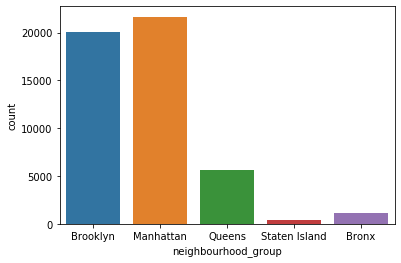

In [105]:
sns.countplot(data["neighbourhood_group"])




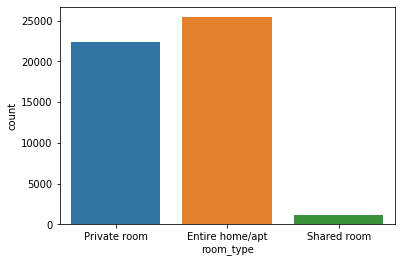

In [106]:
sns.countplot(data['room_type'])

In [107]:
#We can observe reduced preference in shared rooms 

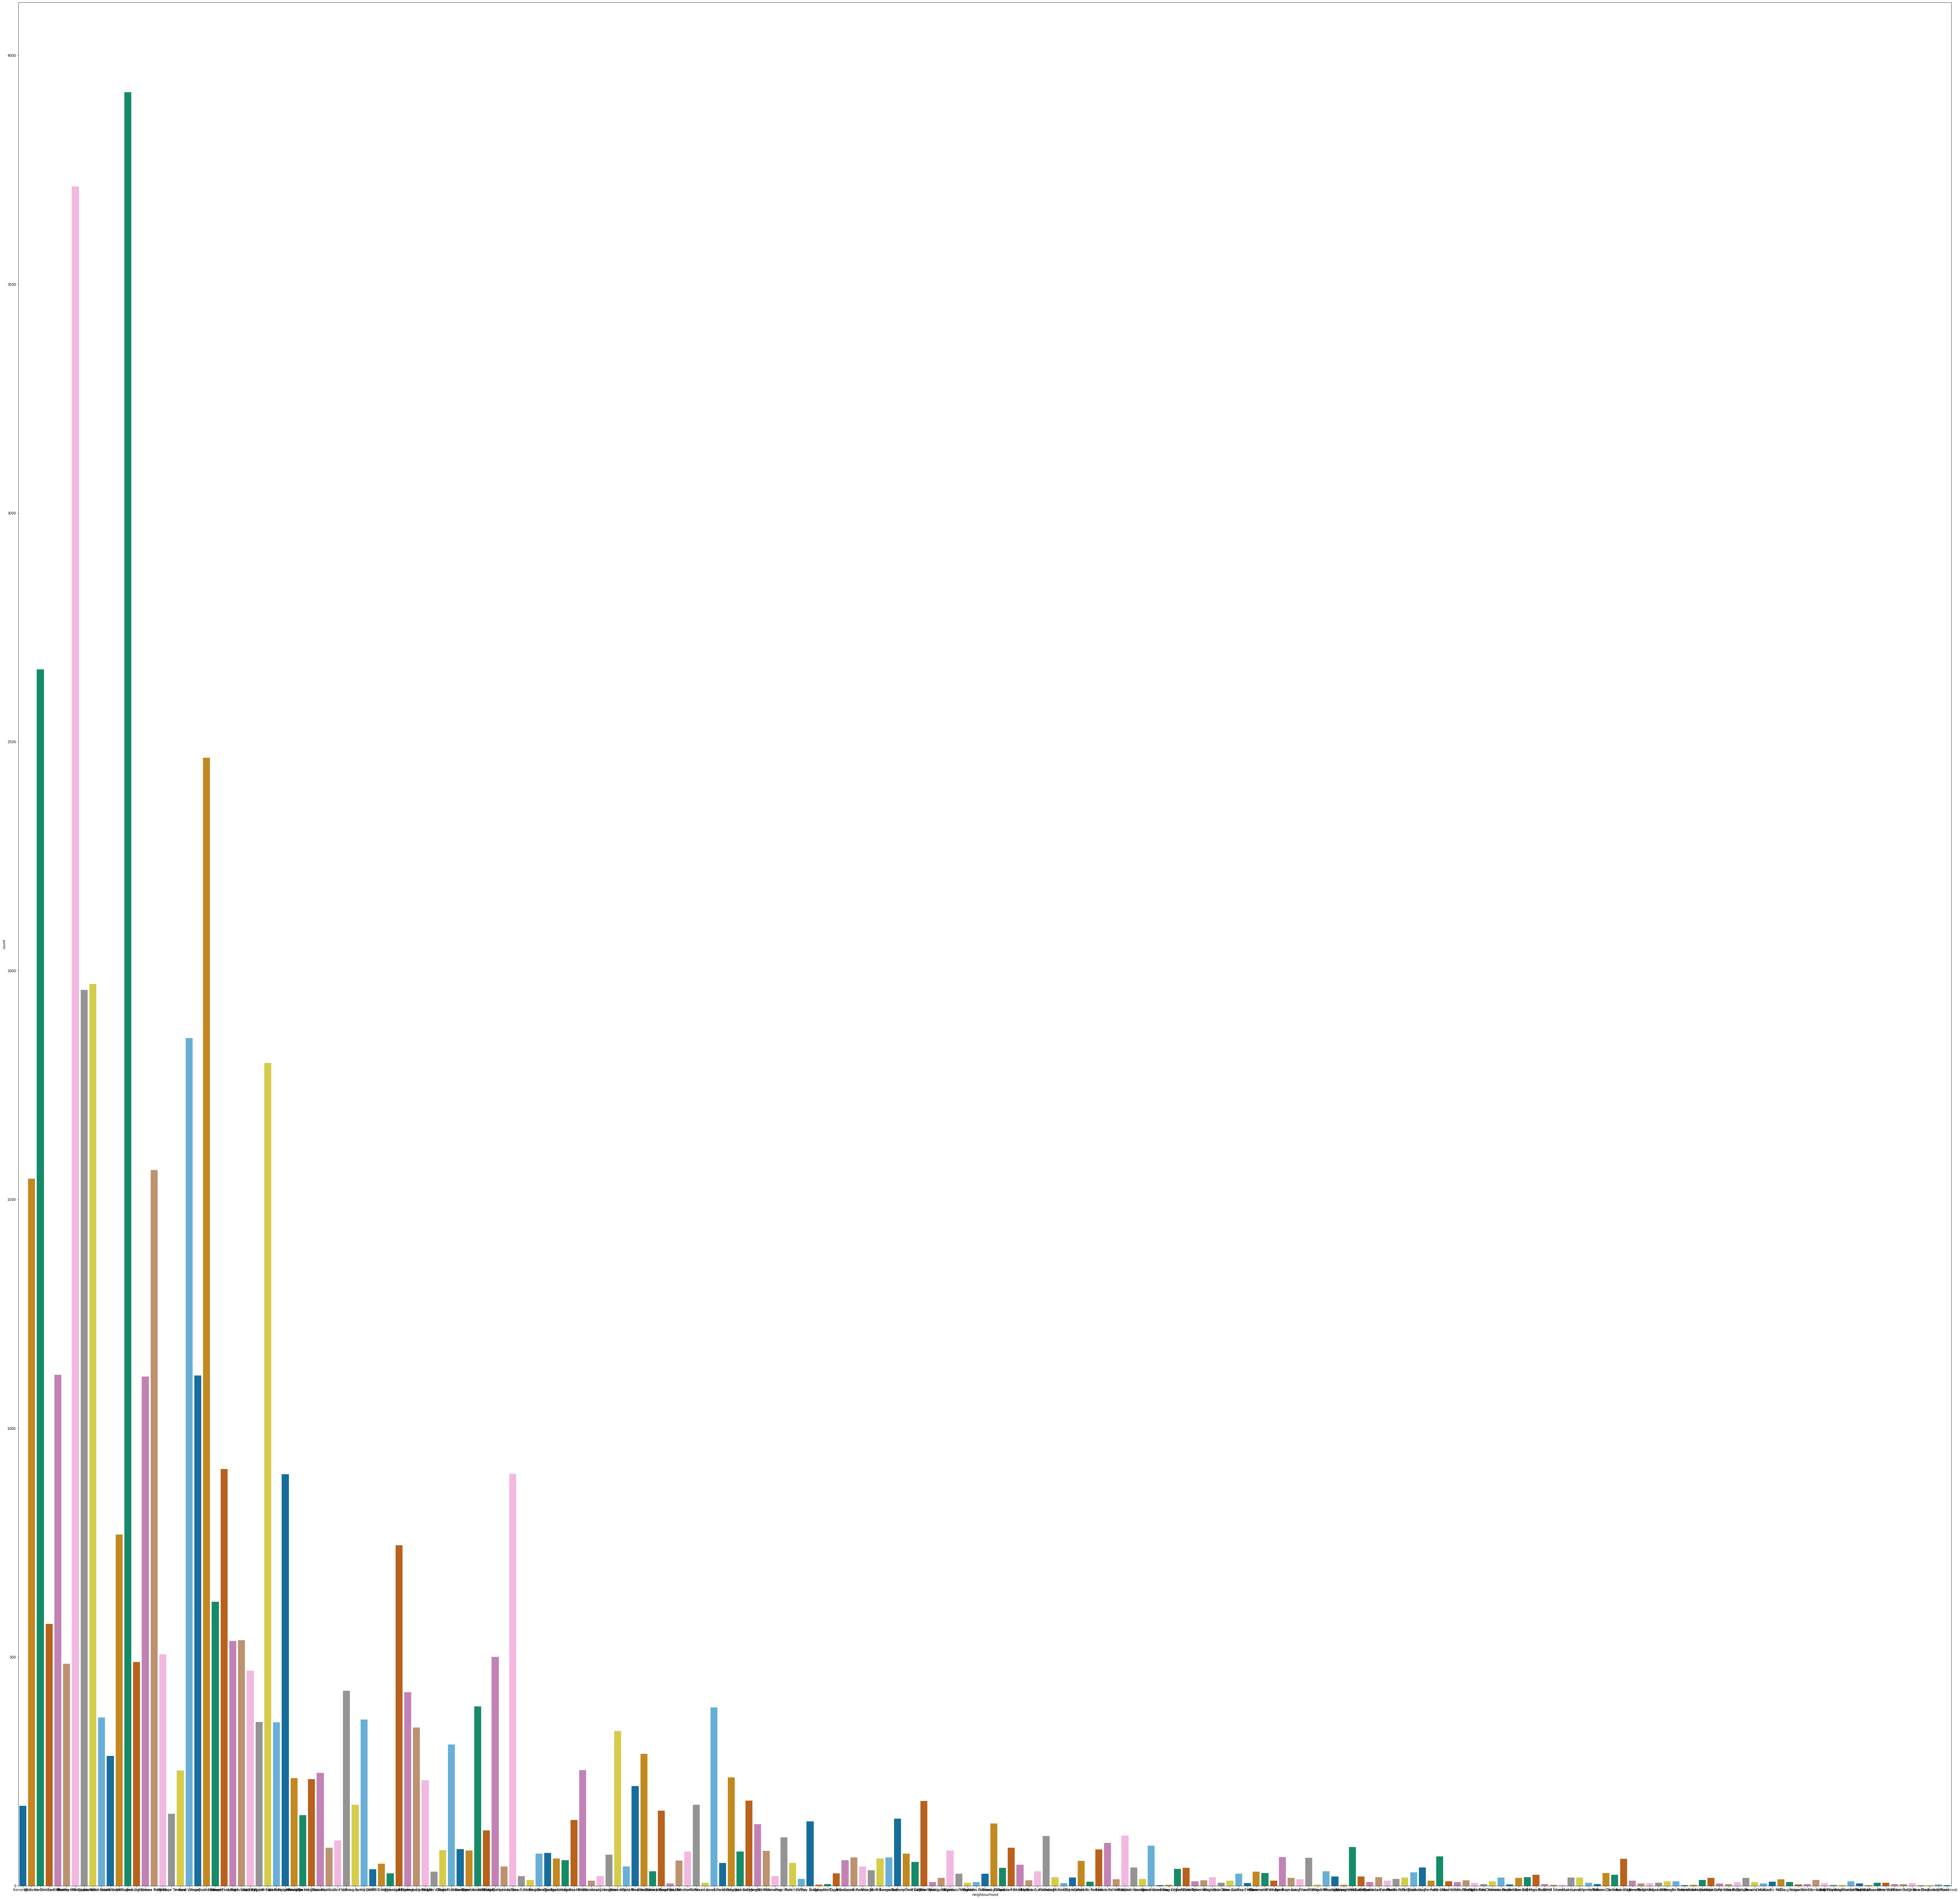

In [108]:
plt.figure(figsize=(100, 100))
a=sns.countplot(data["neighbourhood"], palette="colorblind")


In [109]:
#heavily skewed 

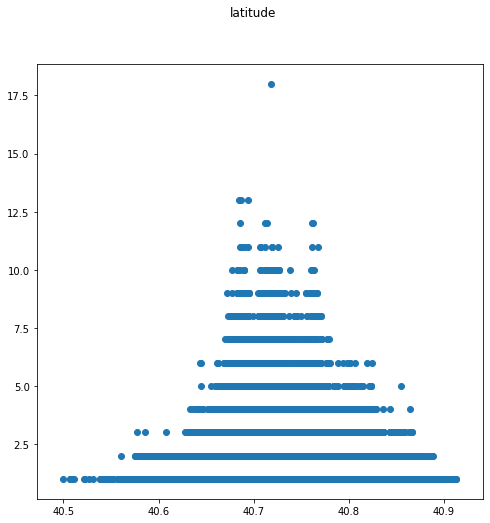

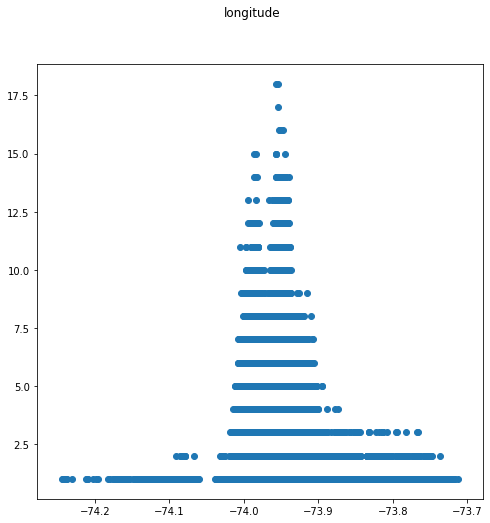

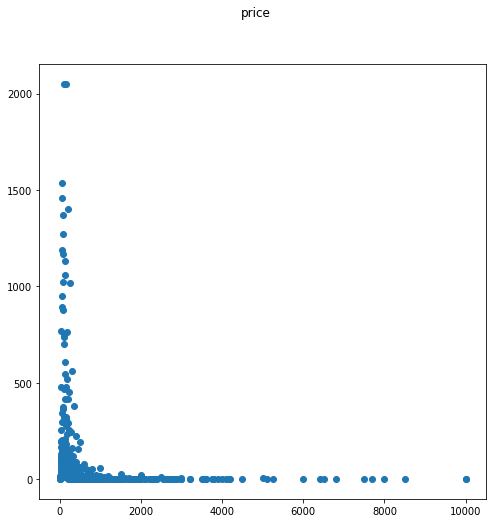

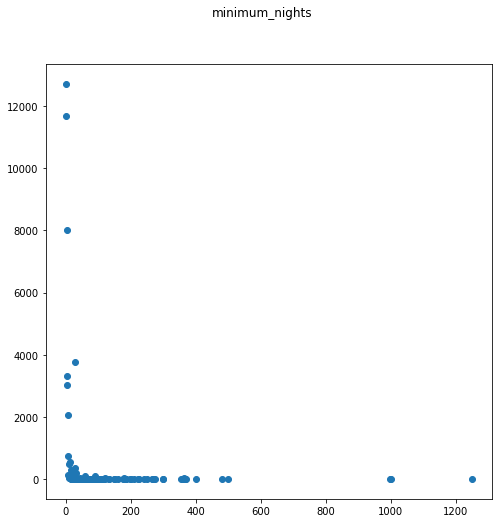

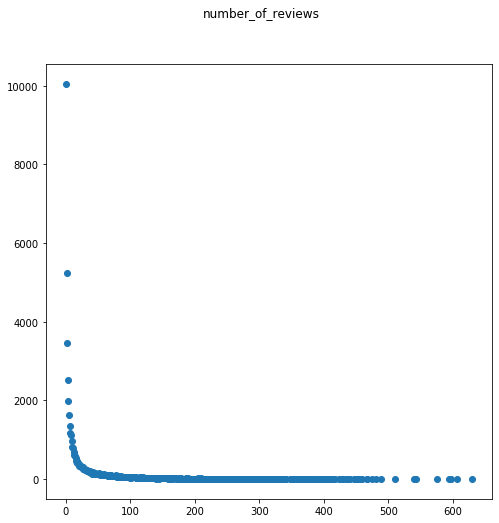

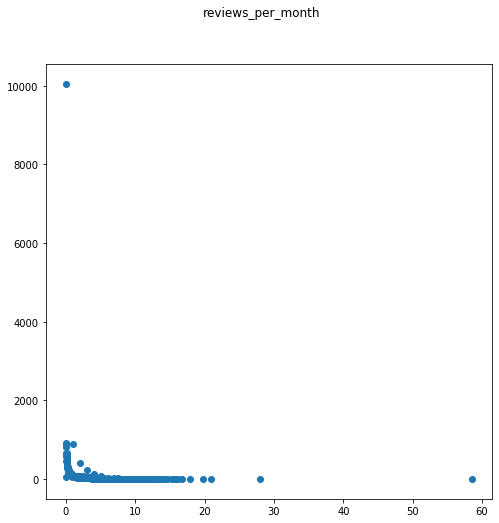

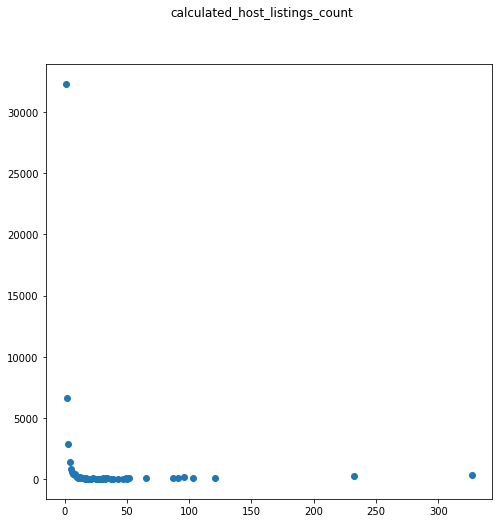

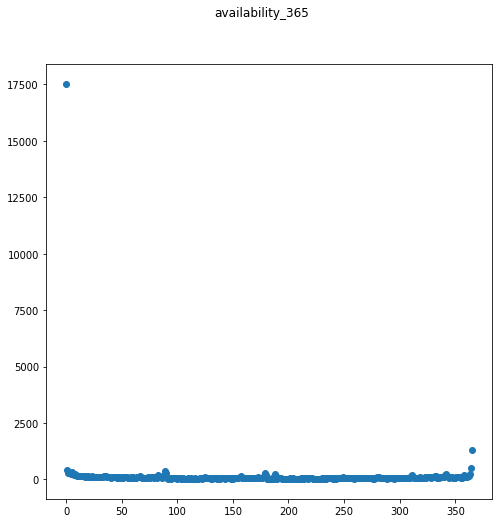

In [110]:
for col in num_col:
    count3=dict(data[col].value_counts())
    names=count3.keys()
    values=count3.values()
    fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharey=True)
    #axs[0].bar(names, values)
    axs.scatter(names, values)
    #axs[2].box(names, values)
    fig.suptitle(col)

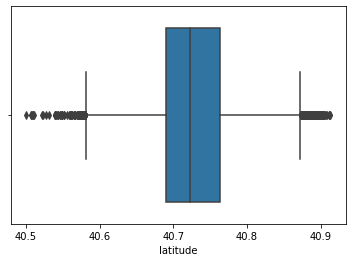

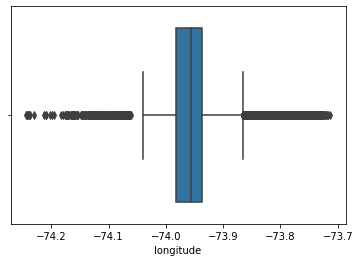

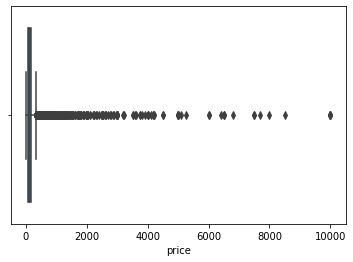

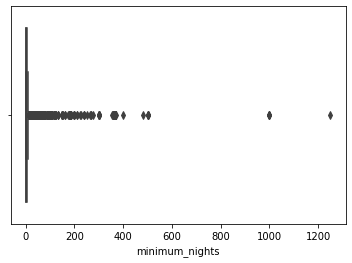

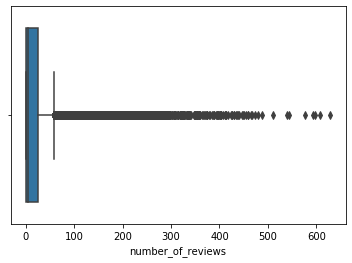

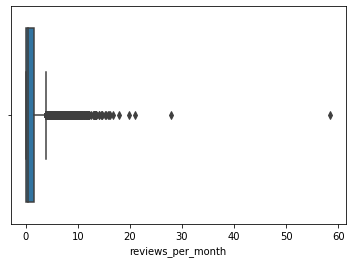

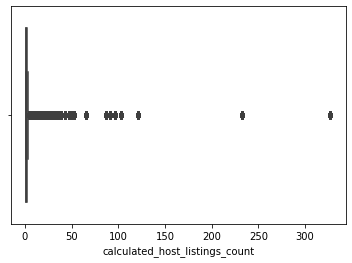

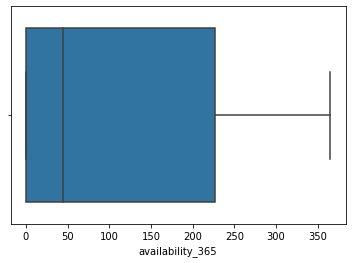

In [111]:
for col in num_col:
    sns.boxplot(data[col])
    plt.show()

In [112]:
#The box plot implies that here are some big outliers
#But on further observation we can conclude that these are misleading

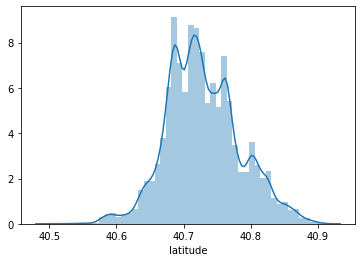

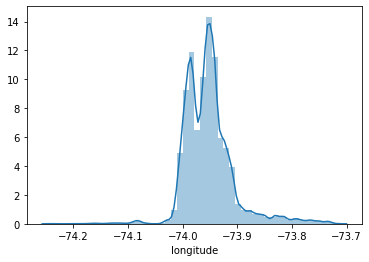

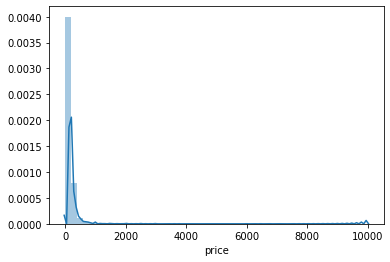

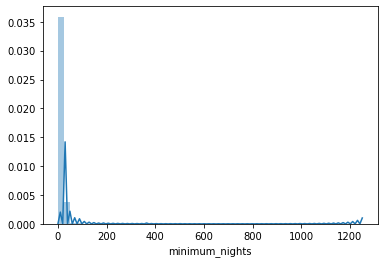

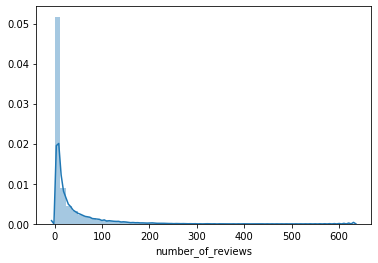

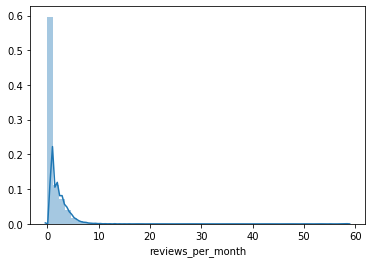

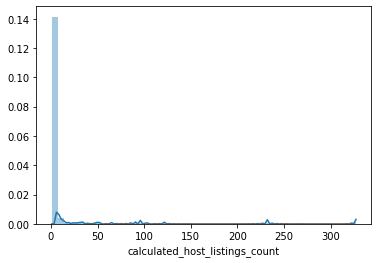

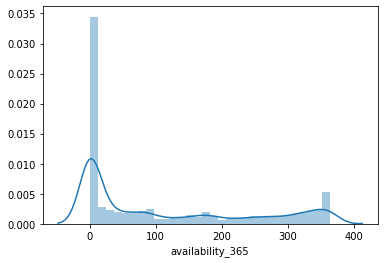

In [113]:
for col in num_col:
    
    sns.distplot(data[col])
    plt.show()

In [114]:
#from the isnull() we observered that there are null values in reviews per month
#Since the distrubution is symmetric for atleast third quartile we can fill null values
#with mean


In [115]:
data.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


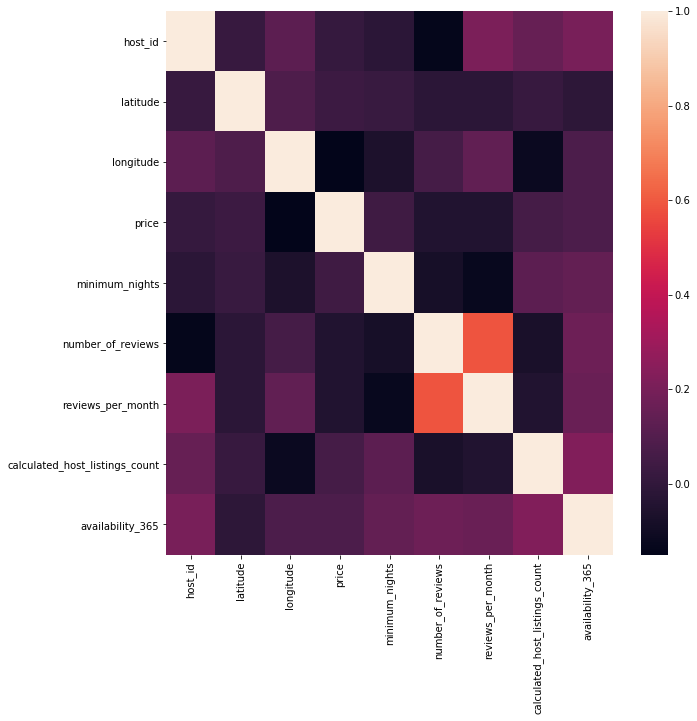

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1295: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


<Figure size 720x720 with 0 Axes>

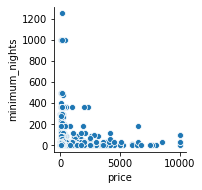

<Figure size 720x720 with 0 Axes>

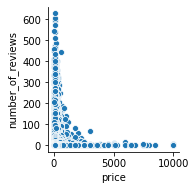

<Figure size 720x720 with 0 Axes>

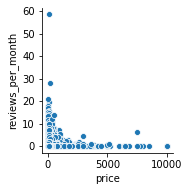

<Figure size 720x720 with 0 Axes>

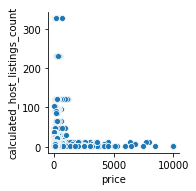

<Figure size 720x720 with 0 Axes>

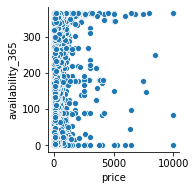

<Figure size 720x720 with 0 Axes>

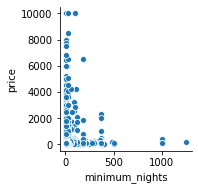

<Figure size 720x720 with 0 Axes>

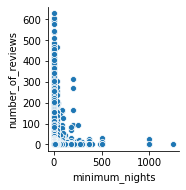

<Figure size 720x720 with 0 Axes>

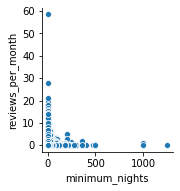

<Figure size 720x720 with 0 Axes>

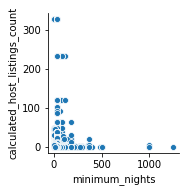

<Figure size 720x720 with 0 Axes>

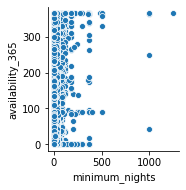

<Figure size 720x720 with 0 Axes>

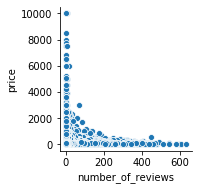

<Figure size 720x720 with 0 Axes>

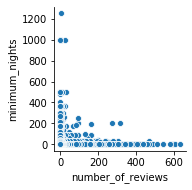

<Figure size 720x720 with 0 Axes>

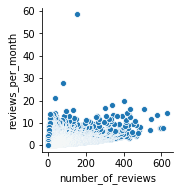

<Figure size 720x720 with 0 Axes>

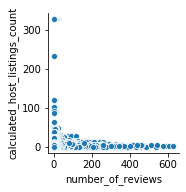

<Figure size 720x720 with 0 Axes>

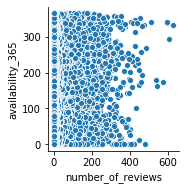

<Figure size 720x720 with 0 Axes>

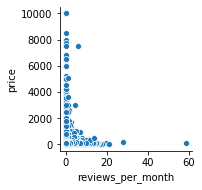

<Figure size 720x720 with 0 Axes>

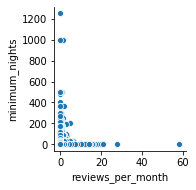

<Figure size 720x720 with 0 Axes>

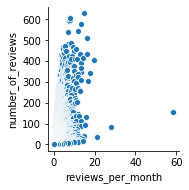

<Figure size 720x720 with 0 Axes>

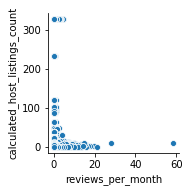

<Figure size 720x720 with 0 Axes>

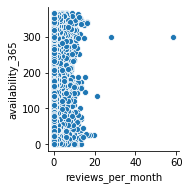

<Figure size 720x720 with 0 Axes>

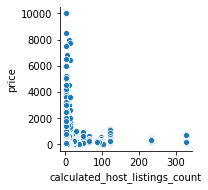

<Figure size 720x720 with 0 Axes>

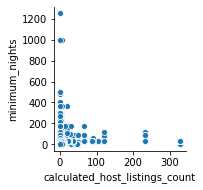

<Figure size 720x720 with 0 Axes>

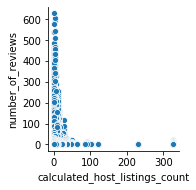

<Figure size 720x720 with 0 Axes>

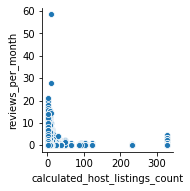

<Figure size 720x720 with 0 Axes>

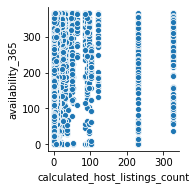

<Figure size 720x720 with 0 Axes>

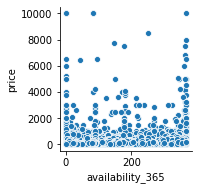

<Figure size 720x720 with 0 Axes>

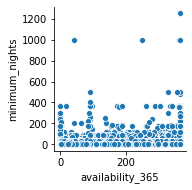

<Figure size 720x720 with 0 Axes>

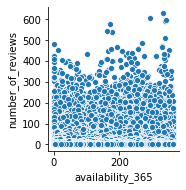

<Figure size 720x720 with 0 Axes>

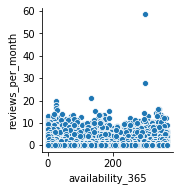

<Figure size 720x720 with 0 Axes>

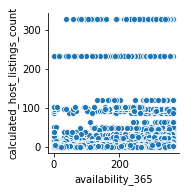

In [117]:
num_cols=['price','minimum_nights','number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
for i in num_cols:
    for j in num_cols:
        if(i!=j):
            plt.figure(figsize=(10,10))
            sns.pairplot(data,x_vars=i,y_vars=j)

In [118]:
#preliminary observations from pair plot
#number of reviews are more for less expensive places
#reviews per month and reviews have a strong correlation 
#minimum number of nights sees more reviews per month


In [119]:
#to plot locaation and price on NY city map

In [120]:
location = pd.read_csv('AB_NYC_2019.csv', usecols=['id', 'latitude', 'longitude', 'price'])
%matplotlib inline

In [121]:
#lat_mean=location['latitude'].mean()
#print(lat_mean)

In [122]:
#long_mean=location['longitude'].mean()
#NY city map inspired from u/skend

In [123]:
lat_mean=-73.925111
long_mean=40.744396
lat = location['latitude']
lon = location['longitude']
price = location['price']

In [124]:
interp_spread = 0.0002
nlat = []
nlon = []
for idx, item in enumerate(price):
    nlat.extend(np.random.uniform(low=lat[idx] - interp_spread, high=lat[idx] + interp_spread, size=(item,)).tolist())
    nlon.extend(np.random.uniform(low=lon[idx] - interp_spread, high=lon[idx] + interp_spread, size=(item,)).tolist())

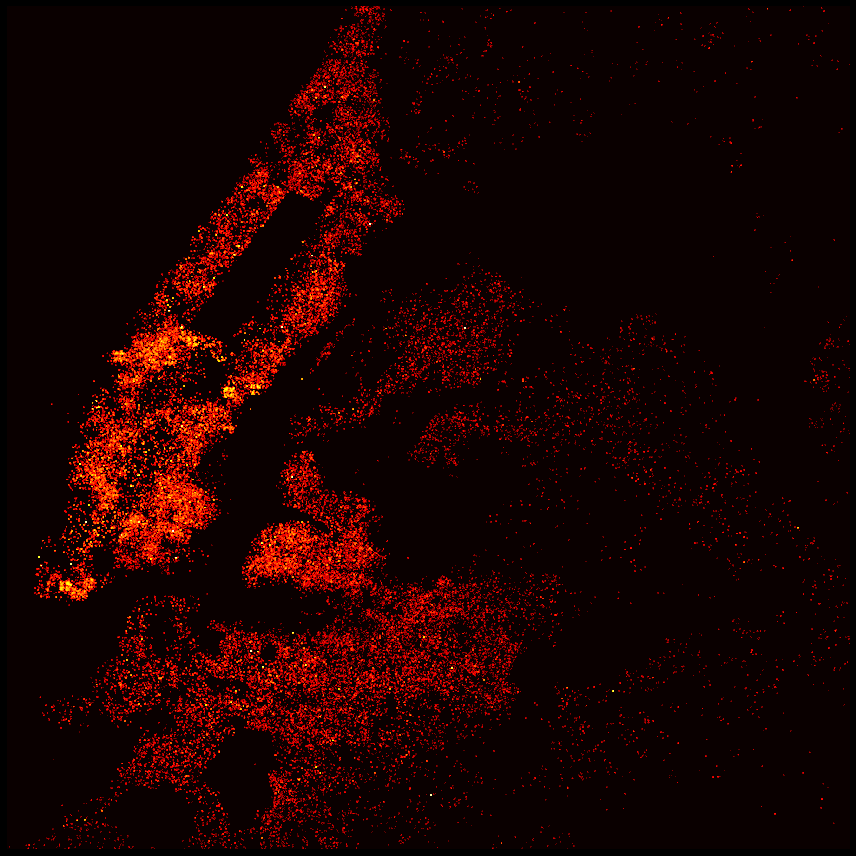

In [125]:

nrbins = 3500
spread = 0.1
hist = np.zeros((nrbins,nrbins))

# Compute the histogram with the longitude and latitude data as a source
hist, x_ranges, y_ranges  = np.histogram2d(x=nlat, y=nlon, bins=nrbins, 
                                          range = [[long_mean - spread, long_mean + spread], [lat_mean - spread, lat_mean + spread]])

# We consider the counts on a logarithmic scale
img = np.log(hist[::-1,:] + 1)

# Plot the counts
plt.figure(figsize=(12,12), facecolor='black')
ax = plt.subplot(1,1,1)
plt.imshow(img, 'hot')
plt.axis('off')
plt.tight_layout()


In [ ]:

#We can observe reduced preference in shared rooms 
#The box plot implies that here are some big outliers
#But on further observation we can conclude that these are misleading
#from the isnull() we observered that there are null values in reviews per month
#Since the distrubution is symmetric for atleast third quartile we can fill null values
#with mean
#preliminary observations from pair plot
#number of reviews are more for less expensive places
#reviews per month and reviews have a strong correlation 
#minimum number of nights sees more reviews per month

In [126]:
data=data[data["price"]<250]
#outliers
data["price"].describe()

count    42669.000000
mean       107.897748
std         53.803457
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

In [127]:
### avg listing by neighbourhood
avg_price=data.groupby("neighbourhood_group")["price"].mean()


In [128]:
avg_price

neighbourhood_group
Bronx             73.796578
Brooklyn          98.068134
Manhattan        128.670990
Queens            83.639941
Staten Island     82.606232
Name: price, dtype: float64

In [129]:

#replacincing minimum night values greater than 30 by 30
data.loc[(data.minimum_nights >30),"minimum_nights"]=30

data.drop(['host_name','last_review',"latitude",'longitude'], axis=1, inplace=True)



In [130]:
#The name feature consists the description of the listing to see how this 
#we take the word count
data["name_length"]=data['name'].map(str).apply(len)
data=data.drop("name",axis=1)

In [131]:
data.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
name_length                         int64
dtype: object

In [132]:
data.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_length'],
      dtype='object')

In [133]:
#one hot encoding
data_1hot = pd.get_dummies(data, columns=['neighbourhood_group','neighbourhood',"room_type"], 
                                 prefix = ['ng','n',"rt"],drop_first=True)


In [134]:
#We would now perform preprocessing using StandardScalar

from sklearn.preprocessing import StandardScaler

#ss = StandardScaler()

data.astype({'price':'int32'})
new_data= data_1hot.copy()
pp = data[num_cols].values
#scaled_val = ss.fit_transform(pp)

#data_temp= pd.DataFrame(scaled_val,columns=num_cols)
#new_data[num_cols]=data_temp



In [135]:
#new_data.describe()

In [136]:
#We now perform test train splits
from sklearn.model_selection import train_test_split



In [137]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score 

accuracy_list = []
model_list = []

#function to return model stats
def model_stats(predictions):
    
    #prediction are model prediction values
    print("-------Confusion Matrix--------")
    print(confusion_matrix(y_test,predictions))
    print('\n')
    print("-------Classification Report--------")
    print(classification_report(y_test,predictions))
    print("-------Accuracy Score--------")
    print(accuracy_score(y_test, predictions))
    accuracy_list.append(accuracy_score(y_test, predictions))

    
#Function to train and test models
def train_model(model,x_train, x_test, y_train, y_test):
    '''
    model            :  Model which is going to be used 
    x_train ,y_train :  features and labels of training data
    x_test, y_test   :  features and labels of testing data
    '''
    model_list.append(model)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    model_stats(predictions)
    
    
    

In [138]:
new_data.head(3)

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,ng_Brooklyn,ng_Manhattan,...,n_Whitestone,n_Williamsbridge,n_Williamsburg,n_Willowbrook,n_Windsor Terrace,n_Woodhaven,n_Woodlawn,n_Woodside,rt_Private room,rt_Shared room
id,,,,,,,,,,,,,,,,,,,,,
2539,2787,149,1,9,0.21,6,365,34,1,0,...,0,0,0,0,0,0,0,0,1,0
2595,2845,225,1,45,0.38,2,355,21,0,1,...,0,0,0,0,0,0,0,0,0,0
3647,4632,150,3,0,0.00,1,365,35,0,1,...,0,0,0,0,0,0,0,0,1,0


In [139]:


#model 1 linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
r = LinearRegression()

X = new_data.loc[:,new_data.columns!="price"]
y = new_data['price']
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size= 0.70,random_state=0);


#training
r.fit(x_train,y_train)
predicted_val = r.predict(x_test)

x = r2_score(y_test,predicted_val)

predicted_val
for i in range(0,5):
    print(predicted_val[i])
y_test.head(5)


y=r.score(x_train,y_train)
print('\nr squared value:')
print(y)

147.64707876205776
168.19397289705813
101.92664069904924
125.11754905925264
143.16983387461104

r squared value:
0.5734777503548212


In [140]:
predicted_val.shape

(12801,)

In [141]:
print(r2_score(y_test,predicted_val))

0.5614250464940715


In [142]:
r.coef_

array([ 7.87707279e-09, -8.59389352e-01, -1.28933593e-02, -1.17637802e+00,
        8.65414070e-02,  5.36828461e-02,  1.35480072e-01,  1.81530360e+01,
        4.66965084e+01,  9.97470940e+00, -9.32511055e+00, -1.75460104e+01,
       -5.77392244e-01,  9.14553398e+00,  4.29775760e+00, -2.26939970e+01,
        1.68460949e+01, -1.10979111e+01,  2.00433121e+01, -2.56714410e+01,
       -8.20572028e+00,  2.32794221e+00,  8.36382939e+00, -5.28126361e+00,
        2.22943433e+01,  1.56431427e+01,  5.74770825e+00, -2.13724684e+01,
       -1.80039616e+01,  2.23027836e+01, -2.16943297e+01,  1.29668707e+02,
       -5.24518562e+00, -1.10862372e+01, -2.85959637e+01,  2.53886497e+01,
       -1.88977612e+01,  7.14571203e+00, -8.22746636e+00,  2.75940672e-01,
       -1.99923238e+01,  1.84258520e+01, -2.48559672e+01,  2.64666062e+01,
        1.88375091e+01, -5.35980063e+00,  4.02590902e+00,  9.40218893e+00,
        8.07637003e+00, -2.64921833e+00,  4.81300669e+00,  1.40632200e+01,
        7.15725466e+00,  

In [143]:
#Feature coeffs
Coef = pd.DataFrame(columns=["Variable","Coefficient"])
Coef["Variable"]=x_train.columns
Coef["Coefficient"]=r.coef_
Coef.sort_values("Coefficient")


,Variable,Coefficient
230,rt_Shared room,-84.175840
130,n_Marble Hill,-64.517024
229,rt_Private room,-61.364997
150,n_New Dorp,-44.874319
112,n_Inwood,-40.170913
...,...,...
102,n_Grymes Hill,53.560253
63,n_DUMBO,54.177280
107,n_Holliswood,72.924517
123,n_Lighthouse Hill,81.993668


In [144]:
# Calculate RMSE
from sklearn import metrics
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, predicted_val))
rmse1

35.855908963518914

In [145]:
#Now performing lasso regression
from sklearn.linear_model import Lasso
regL1 = Lasso(alpha=0.01)
regL1.fit(x_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [146]:
#score
regL1.score(x_train, y_train)

0.5697512321877805

In [147]:
#RMSE
y_pred= regL1.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

35.81750384917525


In [148]:
#slightly better than linear regression

In [149]:
"""from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
train_model(rfc,x_train,x_test,y_train, y_test)"""

'from sklearn.ensemble import RandomForestClassifier\nrfc = RandomForestClassifier(n_estimators=600)\ntrain_model(rfc,x_train,x_test,y_train, y_test)'

In [150]:

#import numpy as np
#from sklearn import linear_model
#from sklearn import svm

#classifiers = [
    #svm.SVR(),
    ##linear_model.BayesianRidge(),
    #linear_model.LassoLars(),
    #linear_model.ARDRegression(),
    #linear_model.PassiveAggressiveRegressor(),
    #linear_model.TheilSenRegressor(),
    #linear_model.LinearRegression()]

#for item in classifiers:
   # print(item)
    #clf = item
    #clf.fit(x_train,y_train)
    #a= clf.predict(x_test)
    #print(str(clf))
    #print('r2_score:\n')
    #print(r2_score(y_test,a))
    #print('\n')

    
#clf = svm.SVR()
#print(item)
#clf = item
#clf.fit(x_train,y_train)
#a= clf.predict(x_test)
#print(str(clf))
#print('r2_score:\n')
#print(r2_score(y_test,a))
#print('\n')'''

In [61]:
#using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regrRM = RandomForestRegressor(n_estimators=300)
regrRM.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
print(regrRM.score(x_train, y_train))
y_pred= regrRM.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.9428235562864818
35.274887454581226


In [63]:
#feature relevance
regrRM.feature_importances_

array([9.49694976e-02, 4.08973410e-02, 4.31906809e-02, 5.74831202e-02,
       3.17014726e-02, 6.17066354e-02, 6.29831716e-02, 3.70677538e-03,
       5.97297970e-02, 1.27442812e-03, 3.06484560e-04, 1.93091470e-06,
       6.61574972e-05, 4.32818582e-04, 1.18826862e-03, 2.31106029e-05,
       1.99335951e-04, 2.58061358e-04, 2.94194365e-05, 1.14161283e-06,
       2.60149516e-06, 1.45370831e-04, 9.09019863e-05, 2.65552417e-03,
       2.53927750e-04, 1.57727612e-04, 2.36033114e-04, 2.81751641e-04,
       1.53022908e-04, 8.78052212e-04, 2.08543859e-04, 3.43665670e-04,
       2.73682682e-04, 1.99237089e-04, 1.84774331e-05, 1.24570787e-03,
       1.50203221e-04, 6.12820620e-06, 2.02302065e-03, 7.63230179e-05,
       2.92162908e-04, 1.25315877e-03, 9.29942962e-06, 6.24676904e-05,
       2.63439500e-03, 8.60110970e-04, 4.73586397e-05, 2.67857047e-04,
       8.29930769e-05, 3.34366903e-06, 1.55703267e-04, 2.20309264e-03,
       1.14298852e-06, 6.06783831e-04, 2.87893717e-05, 1.44995284e-04,
      

In [64]:
# From this we can conclude the model is overfitting we shall try fixing this 

In [65]:
#adjusting hyperparameters to solve overfitting
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
#R2 value and RMSE
print(regrRM2.score(x_train, y_train))
y_pred= regrRM2.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.8197042319845531
35.06256533106831


In [67]:
#performing Randomised Search cross validation for identifying best features
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [68]:
print(rm_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50, 70, 90, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [69]:
# Use the random grid to search for best hyperparameters
import time
t1 = time.time()
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = rm_grid, n_iter = 180, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf2_random.fit(x_train, y_train)
t2 =time.time()


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 113.7min finished


In [89]:
rf2_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [70]:
# Final R squared value
rf2_random.score(x_train, y_train)

0.8793432406972774

In [71]:
#RMSE value
y_pred= rf2_random.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

34.69298187093717


In [151]:
from sklearn import svm

In [152]:
#Using SVR
data_2hot = data[num_cols]

X1=data_2hot.loc[:,data_2hot.columns!="price"]
y1=data_2hot['price']

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, train_size= 0.70,random_state=0);

In [153]:
clf = svm.SVR()
clf.fit(x_train1,y_train1)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [154]:
a= clf.predict(x_test1)
print(str(clf))
print('r2_score:\n')
print(r2_score(y_test1,a))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
r2_score:

0.004527551911423289


In [155]:
#Using various regression models

import numpy as np
from sklearn import linear_model
from sklearn import svm

c = [
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    #linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
 ]
    
for item in c:
    print(item)
    clf = item
    clf.fit(x_train,y_train)
    a= clf.predict(x_test)
    print(str(clf))
    print('r2_score:\n')
    print(r2_score(y_test,a))
    print(np.sqrt(metrics.mean_squared_error(y_test,a)))
    print('\n')




SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
r2_score:

-8.310697212984126e+43
4.935799997417089e+23


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lam

In [156]:
#We Shall repeat all the above steps to predict number_of_reviews


r = LinearRegression()

X = new_data.loc[:,new_data.columns!="number_of_reviews"]
y = new_data['number_of_reviews']
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size= 0.70,random_state=0);

r.fit(x_train,y_train)
predicted_val = r.predict(x_test)

x = r2_score(y_test,predicted_val)

predicted_val
for i in range(0,5):
    print(predicted_val[i])
y_test.head(5)


y=r.score(x_train,y_train)
print('\nr squared value:')
print(y)




8.144870694187407
9.300422196660936
15.35635305213858
79.18255201554246
119.6225036099479

r squared value:
0.47049462920299556


In [157]:
#R2 value
print(r2_score(y_test,predicted_val))

0.4078951987708327


In [158]:
#RMSE
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, predicted_val))
rmse1

34.441823402491984

In [159]:
#Using lasso regression
regL1 = Lasso(alpha=0.01)
regL1.fit(x_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [160]:
regL1.score(x_train, y_train)

0.4674301062827887

In [161]:
#RMSE
y_pred= regL1.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

34.373425068446295


In [162]:
#using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regrRM = RandomForestRegressor(n_estimators=300)
regrRM.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [163]:
print(regrRM.score(x_train, y_train))
y_pred= regrRM.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.9554129783876347
26.4313143472846


In [164]:
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [165]:
#The above model overfits
#Tuning the model to fix it
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [166]:
#R2 values and RMSE
print(regrRM2.score(x_train, y_train))
y_pred= regrRM2.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.8707063268752316
26.745506827729905


In [167]:
#Using Different Regression models
import numpy as np
from sklearn import linear_model
from sklearn import svm

c = [
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    #linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
 ]
    
for item in c:
    print(item)
    clf = item
    clf.fit(x_train,y_train)
    a= clf.predict(x_test)
    print(str(clf))
    print('r2_score:')
    print(r2_score(y_test,a))
    print(np.sqrt(metrics.mean_squared_error(y_test,a)))
    print('\n')

   

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
r2_score:
-4.720333653236627e+44
9.724632387225326e+23


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lamb

In [187]:
#For prediction of prices

price={'model':["LR",'Lasso','RF1',#before tuning
               'RF2',#after tuning
                'RF3',#after randomisedgridsearch
               'Ridge',#'PA',#'PassiveAggressiveRegressor',
                'TS'#'TheilSenRegressor'
               ],
        "R2":[0.5614250464940715,
                    0.5697512321877805,
                    0.9428235562864818,0.8197042319845531,0.8793432406972774,
                    0.5624400611665461,#-3.2140108748821925,
                    0.5592621341690655],
        "RMSE":[35.855908963518914,35.81750384917525,
                     35.274887454581226,35.06256533106831,
                     34.69298187093717,35.814393419768145,
                     #111.144160421833,
                35.94421519821635]}
price = pd.DataFrame(price)


reviews={'model':["LR",'Lasso','RF1',#before tuning
               'RF2',#after tuning
               'Ridge',#'PA',#'PassiveAggressiveRegressor',
                'TS'#'TheilSenRegressor'
                 ],
         "R2":[0.4078951987708327,
              0.4674301062827887,0.9554129783876347,
              0.8707063268752316,0.41072364086973934,
              0.4032850249945138],
         "RMSE":[34.441823402491984,34.373425068446295,
                 26.4313143472846,26.745506827729905,
                 34.359461867910255,34.575646768194694]}
reviews = pd.DataFrame(reviews)
         
            

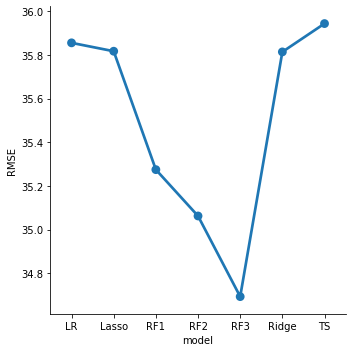

In [188]:
sns.catplot(x='model',y="RMSE",linestyles=["-"],kind="point",data=price)

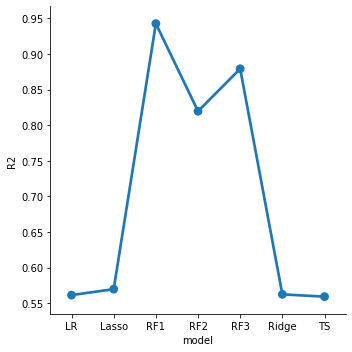

In [189]:
sns.catplot(x='model',y="R2",linestyles=["-"],kind="point",data=price)

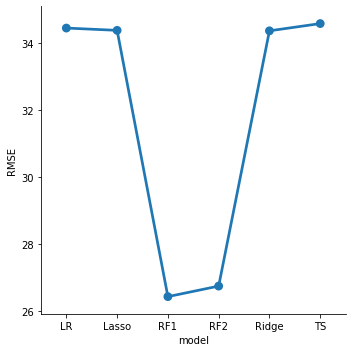

In [190]:
sns.catplot(x='model',y="RMSE",linestyles=["-"],kind="point",data=reviews)

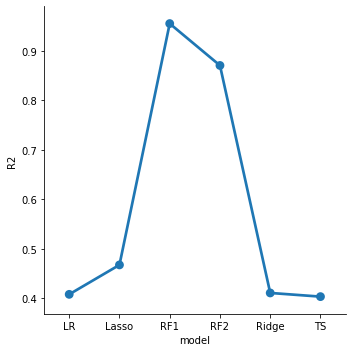

In [191]:
sns.catplot(x='model',y="R2",linestyles=["-"],kind="point",data=reviews)